#데이터 품질 검증과 학습모델


## 교차검증 모델

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

In [ ]:
# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9693916821849783

In [ ]:
# 10개 폴드의 점수를 모두 확인하기
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [ ]:
# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

In [ ]:
# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

In [ ]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9630555555555554

In [ ]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인합니다.
len(cv_results)

50

##데이터 세트 분할

In [ ]:
# iris - train, validation, test dataset으로 분리
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #모델-결정트리
from sklearn.metrics import accuracy_score # 모델 평가함수 -> 정확도
from sklearn.model_selection import train_test_split # 데이터셋을 나누는 함수.

iris_data = load_iris()
iris_data.keys()
X, y = iris_data.data, iris_data.target
X.shape, y.shape

import numpy as np
# train, test로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #기본:0.25
                                                    stratify=y, #target의 class비율에 맞춰서 분리
                                                    random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))

(120, 4) (120,) (30, 4) (30,)
(array([0, 1, 2]), array([40, 40, 40]))


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, stratify=y_train, 
                                                  random_state=1)
X_train.shape, X_val.shape, X_test.shape

((96, 4), (24, 4), (30, 4))

In [ ]:
# 모델 생성
tree = DecisionTreeClassifier()
# 모델 학습 - train set
tree.fit(X_train, y_train)
# 예측 및 평가 - train/validation set
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

train_score = accuracy_score(y_train, pred_train)
val_score = accuracy_score(y_val, pred_val)
print("train set의 예측결과: {}, validation set의 예측결과: {}".format(train_score, val_score))
# ==> train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666

# 최종 평가 - test
pred_test = tree.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print("최종평가(test set): {}".format(test_score))
#==> 최종평가(test set): 0.9666666666666667

train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666
최종평가(test set): 0.9666666666666667


In [ ]:
#KFold
#•지정한 개수(K)만큼 분할한다.
from sklearn.model_selection import KFold

# K-Fold K-개수, fold 나눠진 데이터셋 - 5개
kfold = KFold(n_splits=5)
acc_train_list = [] # 평가지표들을 저장할 리스트
acc_test_list = []

ex = kfold.split(X)
print(type(ex))
next(ex) # 반복자의 다음 요소 구하기
# ==> (array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
#         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
#         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
#         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
#         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
#         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
#        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
#        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
#        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
#        147, 148, 149]),
# array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
#        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

<class 'generator'>


(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [ ]:
for train_index, test_index in kfold.split(X):
    # index를 이용해 훈련/검증 데이터셋 추출
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_test_list, np.mean(acc_test_list)
# ==> ([1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8], 0.9199999999999999)

([1.0,
  0.9666666666666667,
  0.8333333333333334,
  0.9333333333333333,
  0.7666666666666667],
 0.9)

K-Fold의 문제점
•원 데이터셋의 row 순서대로 분할하기 때문에 불균형 문제가 발생할 수 있다.

Stratified K 폴드
•나뉜 fold 들에 label들이 같은(또는 거의 같은) 비율로 구성 되도록 나눈다.


In [ ]:
from sklearn.model_selection import StratifiedKFold

s_fold = StratifiedKFold(n_splits=3)
acc_train_list = []
acc_test_list = []

ex = s_fold.split(X, y) #label의 class 별 동일한 분포로 나눈다.
type(ex)

generator

In [ ]:
for train_index, test_index in s_fold.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)

    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_train_list, np.mean(acc_train_list)
#==> [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

acc_test_list, np.mean(acc_test_list)
#==> ([0.98, 0.92, 0.96, 0.98, 0.92, 0.96], 0.9533333333333333)

([0.98, 0.92, 1.0], 0.9666666666666667)

cross_val_score( )
•데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
•주요매개변수 •estimator: 학습할 평가모델객체
•X: feature
•y: label
•scoring: 평가지표
•cv: 나눌 개수 (K)

•반환값: array - 각 반복마다의 평가점수


In [ ]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()

score_list = cross_val_score(tree, X, y, scoring='accuracy', cv=3)

score_list
#==> array([0.98, 0.94, 0.98])
np.mean(score_list)
# ==> 0.9666666666666667


0.9733333333333333

## 2.3 Scikit Learn 제공 Toy Data를 사용한 실습

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [ ]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test ,y_pred))

Confusion Matrix
[[48  0]
 [ 4 62]]


In [ ]:
print("Accuracy")
print(accuracy_score(y_test, y_pred, normalize = True))

Accuracy
0.9649122807017544


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.94      0.97        66

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
print("AUC")
print(roc_auc_score(y_test, y_pred))

AUC
0.9696969696969697


In [ ]:
print("Mean Squared Error")
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.03508771929824561


In [ ]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
for train_index, test_index in skf.split(X, y):
    print("Train set :", train_index)
    print("Test set:", test_index)

Train set : [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 30

In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print("K Fold Cross Validation Score")
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.94736842 0.84210526 0.92982456 0.85964912 0.94736842 0.89473684
 0.85964912 0.94736842 0.9122807  0.98214286]
Average Accuracy
0.9122493734335839


In [ ]:
skf_sh = StratifiedKFold(n_splits=10, shuffle=True)
skf_sh.get_n_splits(X, y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [ ]:
for train_index, test_index in skf_sh.split(X, y):
    print("Train set:", train_index)
    print("Test set:", test_index)

Train set: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 109 110 111 112 114 115
 116 117 118 119 120 121 123 124 125 126 127 128 129 130 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 162 163 164 165 166 167 169 170 171 172 173
 174 175 176 177 179 180 182 183 184 185 186 187 188 189 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 209 210 211 213 215
 216 217 218 219 220 221 222 223 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 251 252 253
 254 255 256 257 258 259 260 261 262 263

In [ ]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf_sh)
print("K Fold Cross Validation Score")
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.9122807  1.         0.89473684 0.92982456 0.9122807  0.94736842
 0.85964912 0.94736842 0.9122807  0.875     ]
Average Accuracy
0.9190789473684209


#지도_수치 예측 목적의 머신러닝 기법


##선형회귀분석을 이용한 데이터 분석

###3.1 단일선형회귀분석

####3.1.5 단일선형회귀분석 실습 - Basic 1

In [ ]:
# scikit learn 패키지에서 linear_model이라는 모듈을 불러들임
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언

matplotlib.style.use('ggplot')

In [ ]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}

# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


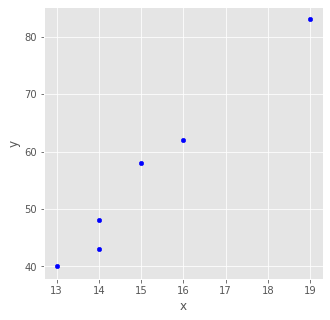

In [ ]:
data.plot(kind="scatter",  # 산점도를 그리시오
          x='x',           # 가로축은 x라고 라벨을 붙임
          y='y',           # 세로축은 y라고 라벨을 붙임
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

In [ ]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# 이 때 독립변수는 x, 종속변수는 y
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])

# 선형 회귀식의 세로축 절편 'linear_regression.intercept_'를 구하여 출력한다.
print('a value = ', linear_regression.intercept_)

# 선형 회귀식의 기울기 'linear_regression.coef_'를 구하여 출력한다.
print('b balue =', linear_regression.coef_)

a value =  -55.48175182481753
b balue = [7.32846715]


In [ ]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))

# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
residuals = data["y"] - prediction
print(residuals)

# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [ ]:
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE = (residuals**2).sum()
print("SSE = ", SSE)

# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)

# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


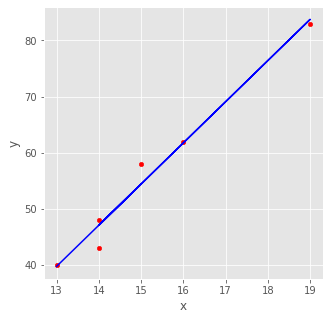

In [ ]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")

# Plot regression line
plt.plot(data["x"],prediction,color="blue")

In [ ]:
# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error

# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))

# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))

# Mean squared error의 제곱근 값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736


### 3.1.6  단일선형회귀분석 실습 - Basic 2

In [ ]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
data_frame.columns = boston_house_prices.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


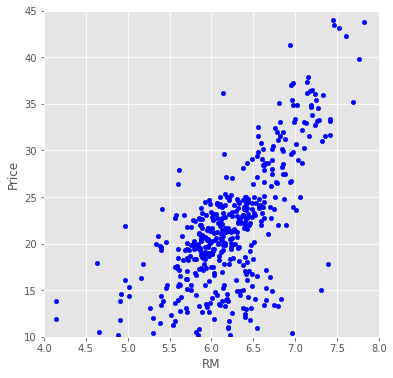

In [ ]:
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6),
                color="blue", xlim = (4,8), ylim = (10,45))

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)

a value =  -34.67062077643857
b balue = [9.10210898]


In [ ]:
residuals = data_frame["Price"] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [ ]:
SSE = (residuals**2).sum()
SST = ((data_frame["Price"]-data_frame["Price"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4835254559913341


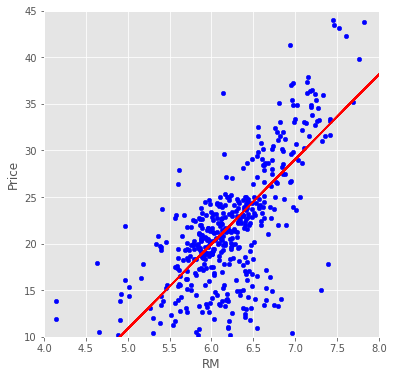

In [ ]:
data_frame.plot(kind="scatter",x="RM",y="Price",figsize=(6,6),
                color="blue", xlim = (4,8), ylim = (10,45))

# Plot regression line
plt.plot(data_frame["RM"],prediction,color="red")

In [ ]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame["Price"]))
print('RMSE = ', mean_squared_error(prediction, data_frame["Price"])**0.5)

score =  0.48352545599133423
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561


## 3.2 다중선형회귀분석

### 3.2.3 다중선형회귀분석 실습 - Basic 1

In [ ]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
data = {'x1' : [13, 18, 17, 20, 22, 21],
        'x2' : [9, 7, 17, 11, 8, 10],
        'y' : [20, 22, 30, 27, 35, 32]}
data = pd.DataFrame(data)
X = data[['x1', 'x2']]
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue = ', linear_regression.coef_)

a value =  -7.359201773835938
b balue =  [1.5443459  0.62472284]


In [ ]:
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean     2.368476e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [ ]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.796944017668523


In [ ]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.796944017668523
Mean_Squared_Error =  5.730691056910575
RMSE =  2.3938861829482567


### 3.2.4  다중선형회귀분석 실습 - Basic 2

In [ ]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(boston_house_prices.data)
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
X.columns = boston_house_prices.feature_names
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
X['Price'] = boston_house_prices.target
y = X.pop('Price')
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)

a value =  36.459488385090125
b balue = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [ ]:
residuals = y-prediction
residuals.describe()

count    5.060000e+02
mean     2.913787e-16
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
Name: Price, dtype: float64

In [ ]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7406426641094094


In [ ]:
print('score = ', linear_regression.score(X = pd.DataFrame(X), y = y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7406426641094095
Mean_Squared_Error =  21.894831181729202
RMSE =  4.679191295697281


# 트리를 이용한 데이터 분석

##  4.1 의사결정 트리를 이용한 데이터 분석

### 4.1.6 예제를 이용한 의사결정 트리 실습 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus
import os

In [ ]:
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [ ]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [ ]:
dt_prediction = dt_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, dt_prediction))

[[1 0]
 [1 2]]


In [ ]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

          10       0.50      1.00      0.67         1
          11       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [ ]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bio

In [ ]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [ ]:
target_name = np.array(['Play No', 'Play Yes'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None, 
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

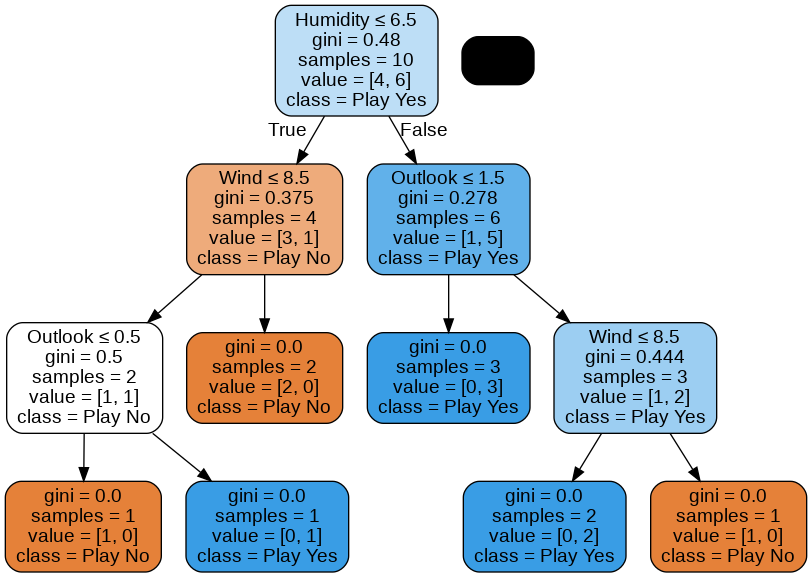

In [ ]:
Image(dt_graph.create_png())

#Scikit-Learn의 의사결정나무 클래스-모듈 생성


In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl 
import numpy as np
import matplotlib.pyplot as plt


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)


    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

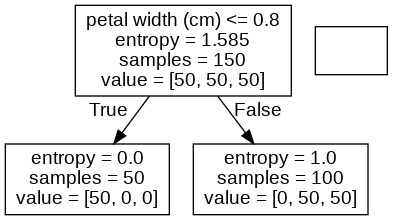

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
tree1

draw_decision_tree(tree1)

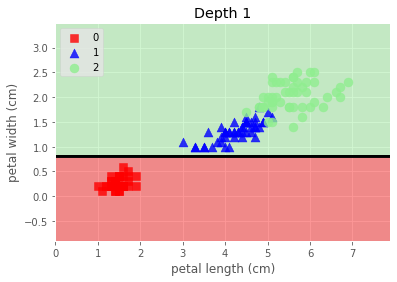

In [ ]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

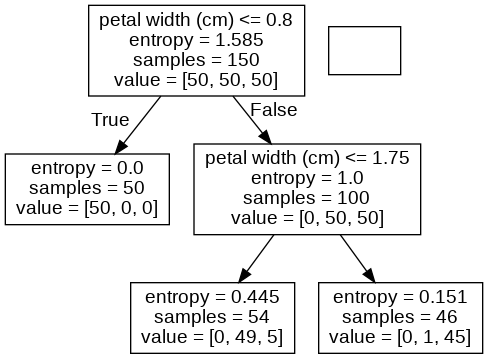

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))



tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)


draw_decision_tree(tree2)

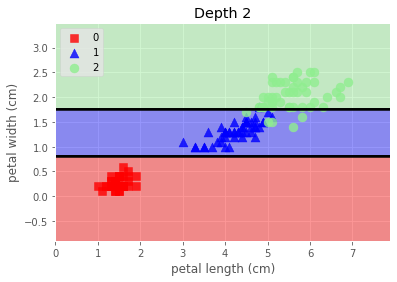

In [ ]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

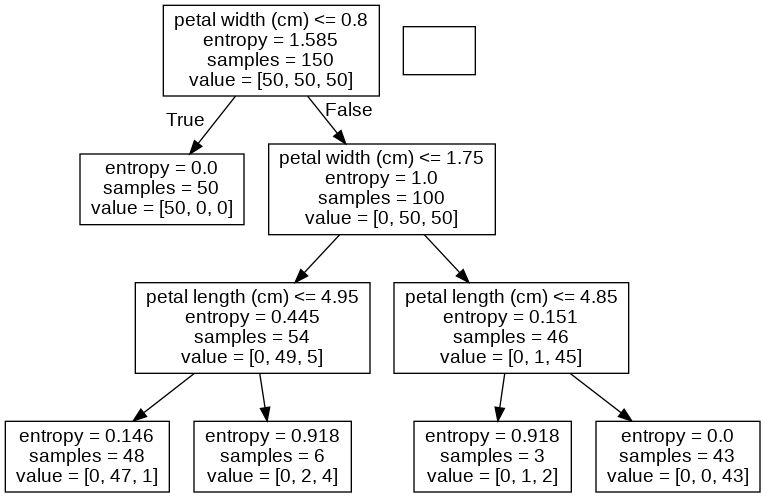

In [ ]:
confusion_matrix(y, tree2.predict(X))

tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

draw_decision_tree(tree3)

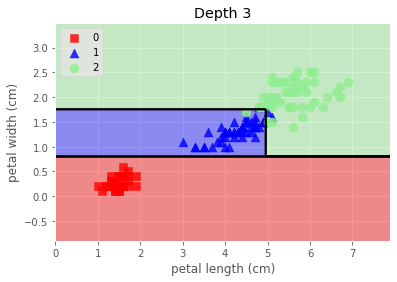

In [ ]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

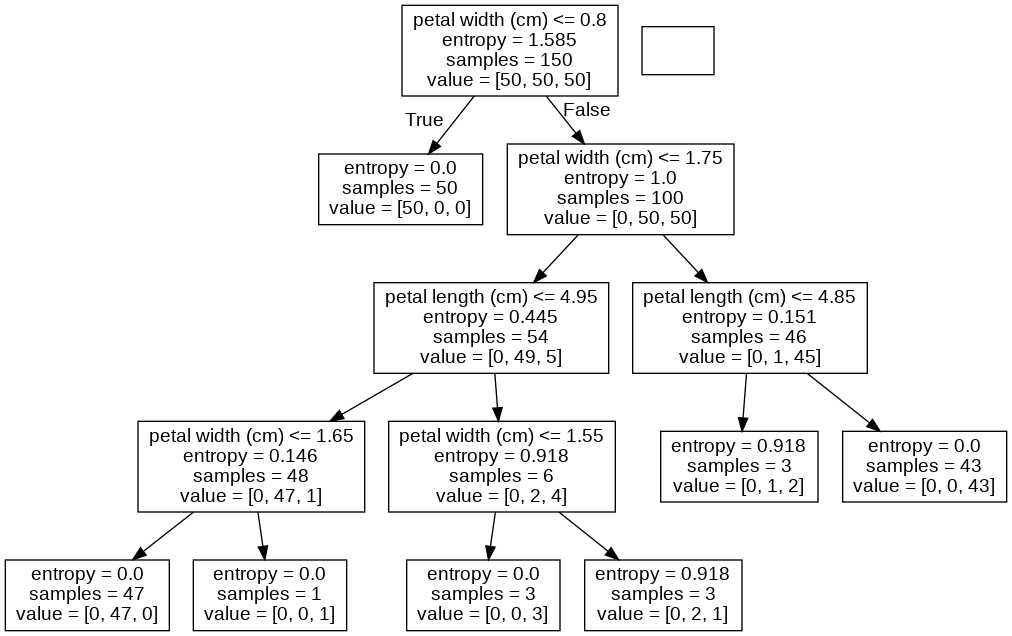

In [ ]:
confusion_matrix(y, tree3.predict(X))
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

draw_decision_tree(tree4)

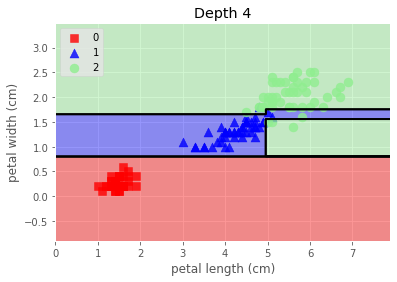

In [ ]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

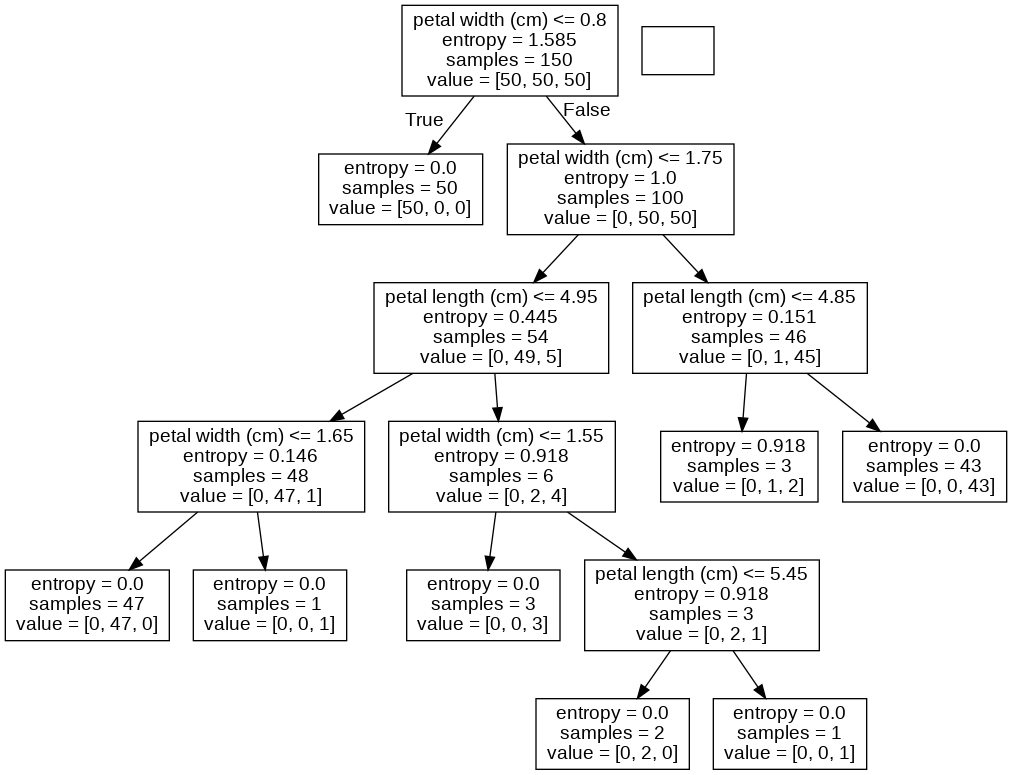

In [ ]:
confusion_matrix(y, tree4.predict(X))

tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)

draw_decision_tree(tree5)

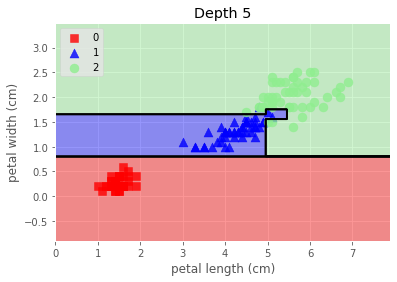

In [ ]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [ ]:
confusion_matrix(y, tree5.predict(X))

from sklearn.metrics import classification_report

print(classification_report(y, tree5.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                               random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

0.9466666666666667

##Quiz : 타이타닉호 생존자 예측

In [ ]:
import pandas as pd

df =  pd.read_csv('titanic_sns.csv')
df.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
feature_names = ["pclass", "age", "Gender"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,Gender
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [ ]:
from sklearn.preprocessing import LabelEncoder
dfX["Gender"] = LabelEncoder().fit_transform(dfX["Gender"])
dfX.tail()

,pclass,age,Gender
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [ ]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,Gender
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,Gender,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


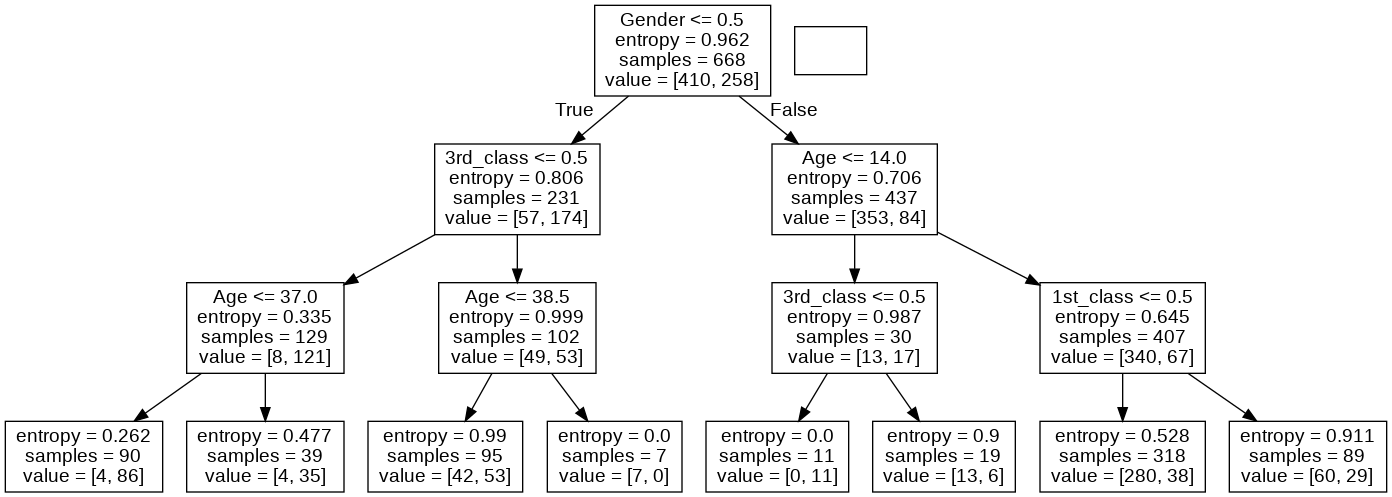

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Gender', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [ ]:
confusion_matrix(y_train, model.predict(X_train))

confusion_matrix(y_test, model.predict(X_test))

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



#앙상블 학습Ensemble Learning

##배깅(bagging) 해보기-집 값 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("kc-house-data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
nCar=data.shape[0]
nVar=data.shape[1]

In [ ]:
print(nCar, nVar)

21613 21


In [ ]:
data=data.drop(['id','date','zipcode','lat','long'],axis=1)

In [ ]:
feature_columns=list(data.columns.difference(['price']))
X=data[feature_columns]
y=data['price']

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(15129, 15) (6484, 15) (15129,) (6484,)


In [ ]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
# 선형회귀모델생성
regression_model=LinearRegression()
# 훈련
linear_model1=regression_model.fit(train_x, train_y)
# 예측
predict1=linear_model1.predict(test_x)
# 결과 인쇄
print('RMSE: {}'.format(math.sqrt(mean_squared_error(predict1, test_y))))

RMSE: 223893.60561816167


## 4.2 랜덤 포레스트(Random Forest)를 이용한 데이터 분석

### 4.2.3 Iris 데이터를 이용해 간단한 랜덤포레스트 구현

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


In [ ]:
#loading the iris dataset
iris = load_iris()

#training data 설정 
x_train = iris.data[:-30]
y_train = iris.target[:-30]
#test data 설정
x_test = iris.data[-30:] # test feature data  
y_test = iris.target[-30:] # test target data

In [ ]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [ ]:
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
#RandomForestClassifier libary를 import
from sklearn.ensemble import RandomForestClassifier
#tree 의 개수 Random Forest 분류 모듈 생성
rfc = RandomForestClassifier(n_estimators=10) 
rfc

RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.fit(x_train, y_train)
#Test data를 입력해 target data를 예측 
prediction = rfc.predict(x_test)
#예측 결과 precision과 실제 test data의 target 을 비교 
print (prediction==y_test)

[ True  True  True False  True  True False False  True False  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
#Random forest 정확도 츶정
rfc.score(x_test, y_test)

0.7666666666666667

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print ("Accuracy is : ",accuracy_score(prediction, y_test))
print ("=======================================================")
print (classification_report(prediction, y_test))

Accuracy is :  0.7666666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      1.00      0.87        23

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Random forest 성능 제고 방법

In [ ]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print (y_test)
print (Y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 2 0 1 1 2 2 0 1 0 1 2 0 0 1 1 0 1 0 1 0 0 0 0 0 2 1 2 1 0]


In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
prediction_1 = rfc.predict(X_test)
#print (prediction_1 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_1, Y_test))
print ("=======================================================")
print (classification_report(prediction_1, Y_test))

Accuracy is :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.91      0.95        11
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Initialize the model
clf_2 = RandomForestClassifier(n_estimators=200, # Number of trees
                               max_features=4,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*
clf_2.fit(X_train, Y_train)
prediction_2 = clf_2.predict(X_test)
print (prediction_2 == Y_test)
print ("Accuracy is : ",accuracy_score(prediction_2, Y_test))
print ("=======================================================")
print (classification_report(prediction_2, Y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Accuracy is :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
for feature, imp in zip(iris.feature_names, clf_2.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.013973949004714563
sepal width (cm) 0.016494165373660868
petal length (cm) 0.372023248338989
petal width (cm) 0.5975086372826356


##랜덤 포레스트 분석

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=bd9952bcb0da25052ea6b7501fde969e59bf1292c9d8ff81a16bdf998c4eee9d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
 # coding: utf-8



from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import mglearn

import numpy as np



cancer = load_breast_cancer()

In [ ]:
# 훈련/테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_train,y_train)


print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))


# 특성 중요도

print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


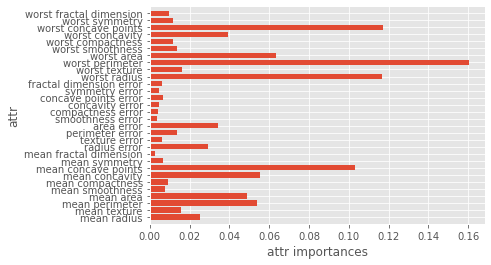

In [ ]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()



plot_feature_importances_cancer(forest)


##Boosting

###AdaBoost


In [ ]:
# 1. 에이다 부스트
# 라이브러리 임포트
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
adaboost=AdaBoostClassifier(random_state=0)
# 훈련
rs_ada=adaboost.fit(data, target)
rs_ada.feature_importances_

array([0.  , 0.  , 0.44, 0.56])

###그래디언트 부스트

In [ ]:
# 2. 그래디언트 부스트
# 라이브러리 임포트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
# 데이터 로드-아이리스
iris=datasets.load_iris()
# 특성 초기화
data=iris.data
target=iris.target
# 부스팅 관련 분류기 객체 생성
gradientboost=GradientBoostingClassifier(random_state=0)
# 훈련
rs_gb=gradientboost.fit(data, target)
rs_gb.feature_importances_

array([0.00636818, 0.01241147, 0.30658557, 0.67463479])

###그래이던트 부스팅 회귀 트리


In [ ]:
# coding: utf-8

from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import mglearn

import numpy as np



cancer = load_breast_cancer()



# 훈련/테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)



gbrt = GradientBoostingClassifier(random_state=0)


gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [ ]:
# coding: utf-8

from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

 

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)



print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

# 훈련 세트 정확도 : 1.000

# 테스트 세트 정확도 : 0.958


# 훈련 세트의 정확도가 100%이므로 과대적합되었다.

# 과대적합을 막기위해 사전 가지치기를 합니다.

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)

gbrt.fit(X_train,y_train)



print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [ ]:
# 과대적합을 막기위해 학습률을 낮춘다

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)

gbrt.fit(X_train,y_train)

 

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


###특성 중요도

In [ ]:

# coding: utf-8

from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np



cancer = load_breast_cancer()



# 훈련/테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
# 훈련 세트의 정확도가 100%이므로 과대적합되었다.

# 과대적합을 막기위해 사전 가지치기를 합니다.

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)



print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))

print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

# 훈련 세트 정확도 : 0.991

# 테스트 세트 정확도 : 0.972



# 특성 중요도

print("특성 중요도 : \n{}".format(gbrt.feature_importances_))





훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


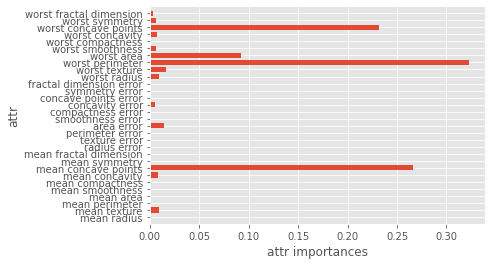

In [ ]:
# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()



plot_feature_importances_cancer(gbrt)
